In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uszipcode import ZipcodeSearchEngine
import numpy as np

explorer = DataExplorer()

In [2]:
def plot3d(X,x,y,z,points, c):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    for i in range(points):
        ax.scatter(X.results[i][x], X.results[i][y],X.results[i][z], c=colors[X.results[i][c-1]])
    return fig

In [3]:
def custPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Clusters')
    plt.ylabel('# of Customers')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Customers per Cluster')
    return fig

In [4]:
def prodPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Products')
    plt.ylabel('# of Products')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Products per Cluster')
    return fig

In [5]:
def clusterCustDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgTotalSpent']=t['totalspent'].mean()
        clusterStats.loc[i,'numHouseholds']=t['householdid'].nunique()
        clusterStats.loc[i,'numZipcoes']=t['zipcode'].nunique()
        clusterStats.loc[i,'avgTotalPopMales']=t['totalmales'].mean()
        clusterStats.loc[i,'avgTotalPopFemales']=t['totalfemales'].mean()
        clusterStats.loc[i,'avgTotalPop']=t['totalpop'].mean()
        clusterStats.loc[i,'medianAge']=t['medianage'].median()
    return clusterStats

In [6]:
def clusterProdDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgRating']=t['avgrating'].mean()
        clusterStats.loc[i,'numCategories']=t['category'].nunique()
        clusterStats.loc[i,'avgDays_on_sale']=t['days_on_sale'].mean()
        clusterStats.loc[i,'avgSpringSales']=t['spring_sales'].mean()
        clusterStats.loc[i,'avgSummerSales']=t['summer_sales'].mean()
        clusterStats.loc[i,'avgFallSales']=t['fall_sales'].mean()
        clusterStats.loc[i,'avgWinterSales']=t['winter_sales'].mean()
        clusterStats.loc[i,'avgOneStars']=t['one_star_votes'].mean()
        clusterStats.loc[i,'avgTwoStars']=t['two_star_votes'].mean()
        clusterStats.loc[i,'avgThreeStars']=t['three_star_votes'].mean()
        clusterStats.loc[i,'avgFourStars']=t['four_star_votes'].mean()
        clusterStats.loc[i,'avgFiveStars']=t['five_star_votes'].mean()
    return clusterStats

In [7]:
def clusterZips(df):
    maxn=df['cluster'].max()
    search = ZipcodeSearchEngine()
    zipstates={}
    zipcities={}
    for i in range(maxn+1):
        #print ("Cluster "+str(i))
        states=set()
        cities=set()
        mask=(df['cluster']==i)
        t=df[['zipcode','cluster']].loc[mask]
        zipcodes=t['zipcode'].unique()
        for j in range(len(zipcodes)):
            city=search.by_zipcode(str(zipcodes[j]))
            cities.add(city['City'])
            states.add(city['State'])
        zipstates.update({i:states})
        zipcities.update({i:cities})
    return zipstates, zipcities

## Category: Customers

Clustering API can be used without any user inputs. The customers will be clustered on numorders, gender, totalpop, totalspent, zipcode, medianage, totalmales, totalfemales

In [8]:
#Get customer clusters 
cCluster=explorer.customers.clusterCustomers()

In [9]:
cCluster_df=pd.DataFrame(cCluster.results, columns=cCluster.columns)

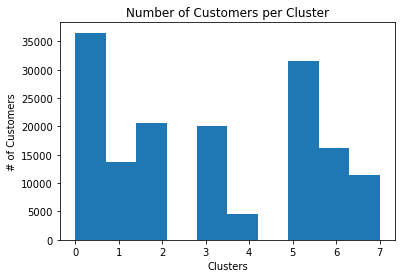

In [10]:
#Histogram of the number of customers in each cluster
dist=custPerCluster(cCluster_df)
dist

In [11]:
#Stats by cluster
stats=clusterCustDist(cCluster_df)
stats

,avgNumOrders,avgTotalSpent,numHouseholds,numZipcoes,avgTotalPopMales,avgTotalPopFemales,avgTotalPop,medianAge
0,1.193163,82.823236,36293.0,3153.0,5660.011960,6021.948466,11681.960426,42.3
1,1.178315,75.737771,13760.0,1166.0,17636.639676,18869.664446,36506.304121,38.4
2,1.210148,85.677047,20474.0,375.0,24946.821880,27539.317652,52486.139531,39.0
3,1.172682,95.193342,20003.0,2300.0,10140.160635,10368.391906,20508.552541,40.1
4,1.220992,62.339801,4498.0,62.0,39365.412090,44814.675155,84180.087245,37.7
5,1.226552,80.805738,31350.0,910.0,14504.037383,15598.255057,30102.292441,40.5
6,1.177069,86.732503,16154.0,2760.0,7889.804448,8322.499969,16212.304417,41.4
7,1.164209,83.256304,11421.0,989.0,23202.926533,23832.407818,47035.334351,36.7


In [12]:
cCluster.columns

array(['numorders', 'gender', 'totalpop', 'totalspent', 'zipcode',
       'medianage', 'totalmales', 'totalfemales', 'customermatchedid',
       'householdid', 'firstname', 'numcustomerid', 'cluster',
       'customerids'], dtype=object)

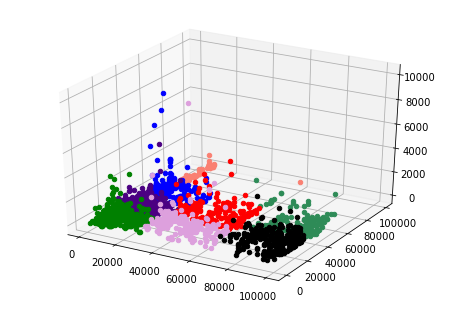

In [13]:
#3-D Plot of the customer clusters (zipcode, totalpop, totalspent)
plot=plot3d(cCluster, 4,2, 3, 3000, cCluster_df.shape[1]-1)
plot

Clustering Function with User Input. User indicates the number of clusters and what to cluster the data on. numorders, gender, totalpop, medianage

In [14]:
#Get 10 clusters for customers clustering on numorders, gender, totalpop, and medianage
cCluster2=explorer.customers.clusterCustomers(n_clusters=10, 
                                              cluster_on=['numorders','gender',
                                                          'totalpop','medianage'],
                                             random_state=2)

In [15]:
cCluster2_df=pd.DataFrame(cCluster2.results, columns=cCluster2.columns)

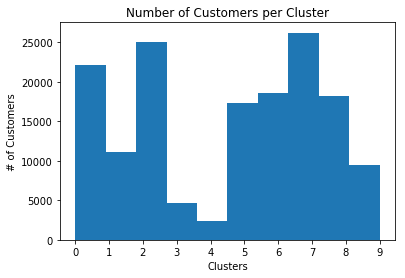

In [16]:
dist2=custPerCluster(cCluster2_df)
dist2

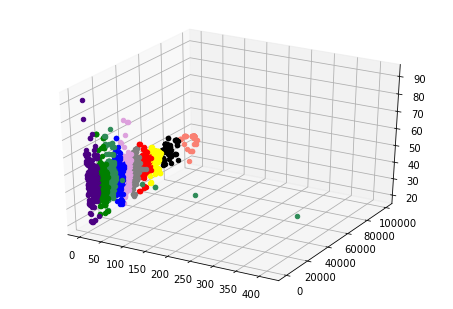

In [17]:
#3-D Plot of the customer clusters (numorders, totalpop, medianage)
plot=plot3d(cCluster2, 0,2, 3, 3000, cCluster2_df.shape[1]-1)
plot

Define the set of customers that will be clustered. Cluster customers who have spent less than $50 on products

In [18]:
#Determine the householdids of the customers who have spent less than $50 on products
statsByCustomer=explorer.customers.statsByCustomer()
statsByCustomer_df=pd.DataFrame(statsByCustomer.results, columns=statsByCustomer.columns)
cust_totspent_G50=statsByCustomer_df.loc[statsByCustomer_df['totalspent']>50]['householdid'].values
cust_totspent_G50 = [ int(x) for x in cust_totspent_G50]
statsL50=explorer.customers.statsByCustomer(householdid=cust_totspent_G50)

In [19]:
statsL50_df=pd.DataFrame(statsL50.results, columns=statsL50.columns)
statsL50_df.head()

,customermatchedid,numorders,gender,zipcode,totalpop,medianage,totalmales,totalfemales,totalspent,householdid,firstname,numcustomerid
0,140299,99,0,10036,22413,38.8,12687,9726,0.00,49927024,MIKE,99
1,140298,70,0,10036,22413,38.8,12687,9726,0.00,49927024,JIM,70
2,91531,6,1,10461,51599,38.5,25079,26520,49.95,36184181,SANDRA,6
3,118095,6,1,10028,45799,39.7,20281,25518,31.65,36210826,ELIZABETH,6
4,13604,5,1,33415,43742,35.4,21032,22710,39.30,18742411,JANET,5


In [20]:
#Cluster the customers who have spent less than $50 into 8 clusters
cCustomerL50=explorer.customers.clusterCustomers(feature_set=statsL50, n_clusters=8,
                                                 cluster_on=['numorders','gender','medianage',
                                                            'totalpop'],
                                                random_state=3)
cCustomerL50_df=pd.DataFrame(cCustomerL50.results, columns=cCustomerL50.columns)

In [21]:
cCustomerL50.columns

array(['numorders', 'gender', 'medianage', 'totalpop', 'customermatchedid',
       'zipcode', 'totalmales', 'totalfemales', 'totalspent',
       'householdid', 'firstname', 'numcustomerid', 'cluster',
       'customerids'], dtype=object)

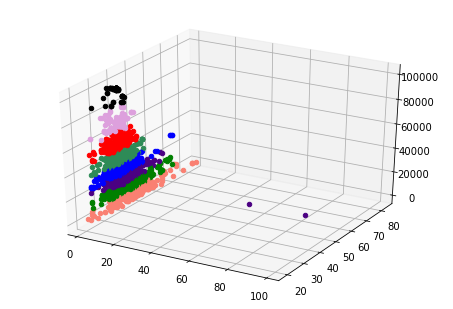

In [22]:
#3-D Plot of the customer clusters (numorders, medianage, totalpop)
plot=plot3d(cCustomerL50, 0,2, 3, 3000, cCustomerL50_df.shape[1]-1)
plot

## Product Clustering

Product Clustering is flexible like the customer clustering is. Cluster products that have been purchased 51-15,000 times. 

In [23]:
statsByProd=explorer.products.statsByProduct()
statsByProd_df=pd.DataFrame(statsByProd.results, columns=statsByProd.columns)

In [24]:
prod_asin=statsByProd_df.loc[(statsByProd_df['numorders']>50) & 
                             (statsByProd_df['numorders']<1500)]['asin'].values

In [25]:
prod_toCluster=explorer.products.statsByProduct(asin=prod_asin)

In [26]:
prodClustering=explorer.products.clusterProducts(feature_set=prod_toCluster, n_clusters=7, 
                                                cluster_on=['numorders','days_on_sale',
                                                            'one_star_votes','two_star_votes',
                                                            'three_star_votes','four_star_votes',
                                                            'five_star_votes'],
                                                random_state=2)

In [27]:
prodClustering_df=pd.DataFrame(prodClustering.results, columns=prodClustering.columns)

In [28]:
prodDist=clusterProdDist(prodClustering_df)
prodDist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,131.514620,4.244667,170.0,607.152047,9.830409,12.801170,14.526316,19.584795,0.485380,0.561404,1.052632,2.397661,5.479532
1,255.763158,4.290984,76.0,1969.947368,39.697368,36.710526,37.500000,64.736842,0.105263,0.092105,0.197368,0.539474,1.671053
2,1063.945455,4.226413,55.0,372.890909,56.145455,73.872727,104.327273,212.654545,6.763636,7.472727,11.363636,25.309091,78.963636
3,186.004739,4.269074,210.0,136.113744,7.601896,10.545024,8.270142,18.791469,3.459716,3.360190,6.175355,14.293839,39.450237
4,207.577143,4.293295,174.0,1169.177143,22.137143,23.897143,23.091429,46.148571,0.205714,0.205714,0.377143,0.811429,3.097143
5,1186.523810,4.583666,21.0,1655.523810,128.333333,129.285714,143.000000,257.095238,0.523810,0.571429,0.857143,2.619048,11.666667
6,575.594595,4.217675,74.0,746.648649,42.675676,35.027027,53.945946,85.000000,1.067568,1.364865,2.148649,4.148649,10.567568


In [29]:
clustDist=clusterProdDist(prodClustering_df)
clustDist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales,avgOneStars,avgTwoStars,avgThreeStars,avgFourStars,avgFiveStars
0,131.514620,4.244667,170.0,607.152047,9.830409,12.801170,14.526316,19.584795,0.485380,0.561404,1.052632,2.397661,5.479532
1,255.763158,4.290984,76.0,1969.947368,39.697368,36.710526,37.500000,64.736842,0.105263,0.092105,0.197368,0.539474,1.671053
2,1063.945455,4.226413,55.0,372.890909,56.145455,73.872727,104.327273,212.654545,6.763636,7.472727,11.363636,25.309091,78.963636
3,186.004739,4.269074,210.0,136.113744,7.601896,10.545024,8.270142,18.791469,3.459716,3.360190,6.175355,14.293839,39.450237
4,207.577143,4.293295,174.0,1169.177143,22.137143,23.897143,23.091429,46.148571,0.205714,0.205714,0.377143,0.811429,3.097143
5,1186.523810,4.583666,21.0,1655.523810,128.333333,129.285714,143.000000,257.095238,0.523810,0.571429,0.857143,2.619048,11.666667
6,575.594595,4.217675,74.0,746.648649,42.675676,35.027027,53.945946,85.000000,1.067568,1.364865,2.148649,4.148649,10.567568


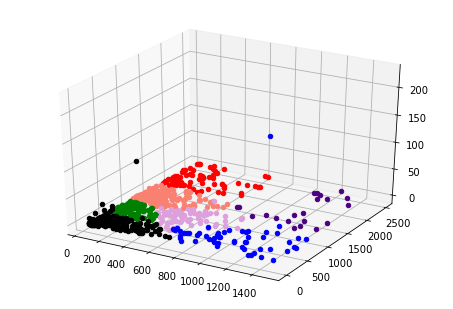

In [30]:
#3-D plot numorders, days_on_sale, one_star_votes
plot=plot3d(prodClustering,0,1,2,prodClustering_df.shape[0],prodClustering_df.shape[1])
plot

Product Clustering with PCA. If n_components is less than len(cluster_on) then the dimentionality will be reduced to the size of n_components.

In [31]:
cluster_pca=explorer.products.clusterProducts(feature_set=prod_toCluster,
                                              n_clusters=7,
                                              n_components=3,
                                              cluster_on=['numorders','days_on_sale',
                                                            'one_star_votes','two_star_votes',
                                                            'three_star_votes','four_star_votes',
                                                            'five_star_votes'],
                                              random_state=3)

/Users/laurawilke/Documents/DSE/lwilke/DSE203/dse203-group-project/data_exploration/dora/products.py:513: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if col not in clustering.columns.values:


In [32]:
cluster_pca_df=pd.DataFrame(cluster_pca.results, columns=cluster_pca.columns)

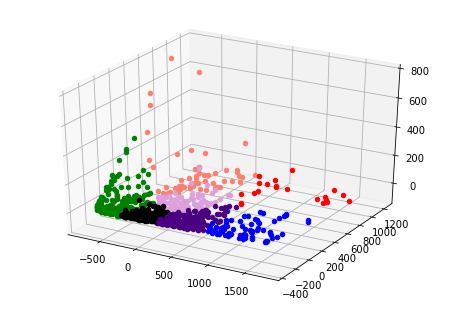

In [33]:
#3-D plot 
plot=plot3d(cluster_pca, 0,1,2, cluster_pca_df.shape[0], cluster_pca_df.shape[1])
plot